# <center> Case study: Survival classification with Titanic dataset </center>

## 1. Quick reviews
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Logistic Regression, Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 2. Titanic dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons for the sinking of the Titanic was the lack of supplies and medical expertise. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data as explained below:

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

The goal is to predict if a passenger survived the sinking of the Titanic or not (`survived`), regarding the passenger’s attributes. 

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and quick view data

In [54]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [55]:
data = data.drop(['class','embark_town','alive'],axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
 10  deck        203 non-null    category
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.8+ KB


In [10]:
pd.DataFrame(data.isna().sum()/len(data)*100).T

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.224467,0.0,0.0,77.216611,0.0


In [ ]:
''' -> Problem 1: Missing values ('age','embarked','deck') '''

In [11]:
data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,203,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2,7,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,man,True,C,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,537,537,59,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.select_dtypes(exclude=['int64','float64']).describe()

,sex,embarked,who,adult_male,deck,alone
count,891,889,891,891,203,891
unique,2,3,3,2,7,2
top,male,S,man,True,C,True
freq,577,644,537,537,59,537


In [ ]:
''' -> Problem 2: Data not on same scale '''

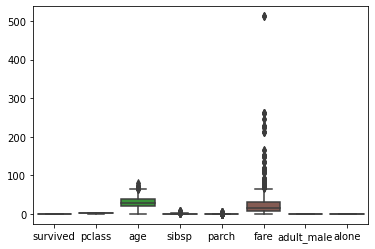

In [14]:
sns.boxplot(data=data)

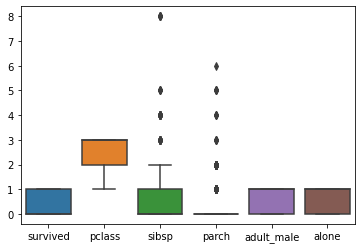

In [15]:
sns.boxplot(data=data.drop(['age','fare'],axis=1))

https://www.youtube.com/watch?v=vcbMinm_1Q8

1.5 IQR Rule

In [ ]:
''' -> Problem 3: Outliers ('sibsp','parch') '''

In [18]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
''' -> Problem 4: Imbalanced data: survived '''

In [19]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

# EDA

## Descriptive analysis

In [20]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.select_dtypes(exclude=['int64','float64']).describe()

,sex,embarked,who,adult_male,deck,alone
count,891,889,891,891,203,891
unique,2,3,3,2,7,2
top,male,S,man,True,C,True
freq,577,644,537,537,59,537


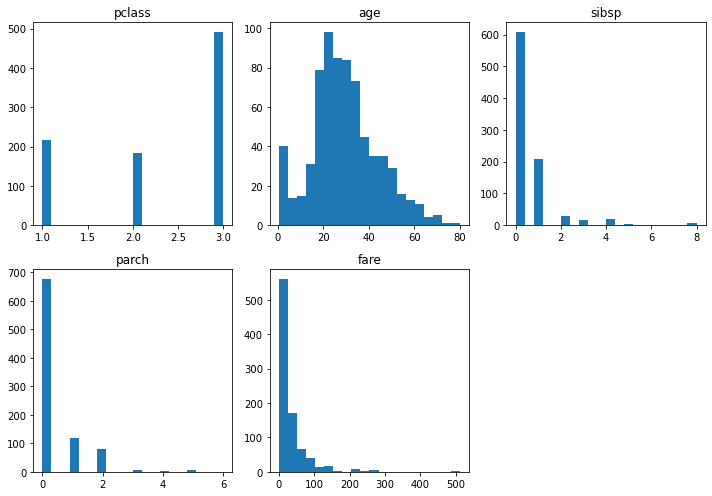

In [22]:
df_num = data.select_dtypes(['int64','float64']).drop('survived',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=20, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

## Diagnostic Analysis

In [23]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

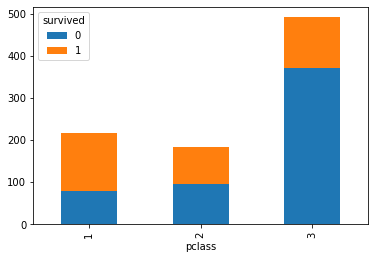

In [27]:
df = pd.pivot_table(data=data,index='pclass',columns='survived',values='who',aggfunc='count').reset_index()
df.plot(x='pclass',kind='bar',stacked=True)

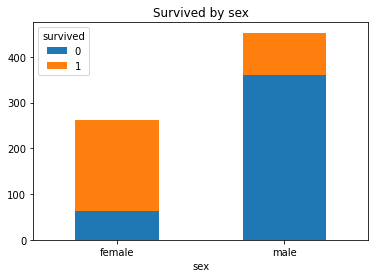

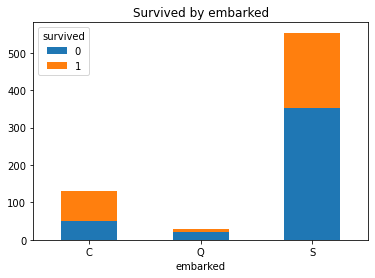

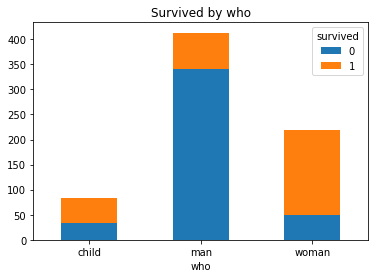

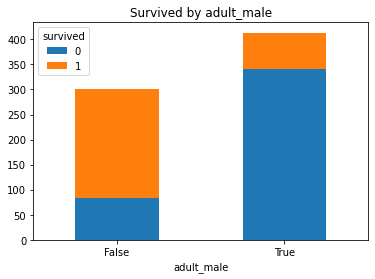

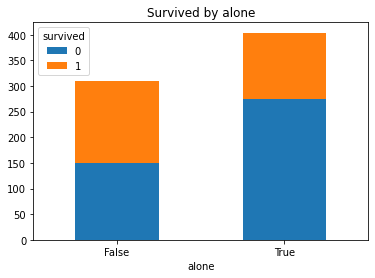

In [30]:
for c in ['sex','embarked','who','adult_male','alone']:
    df = pd.pivot_table(data=data,index=c,columns='survived',values='age',aggfunc='count').reset_index()
    df.plot(x=c,kind='bar',stacked=True)
    plt.title('Survived by {}'.format(c))
    plt.xticks(rotation=360)

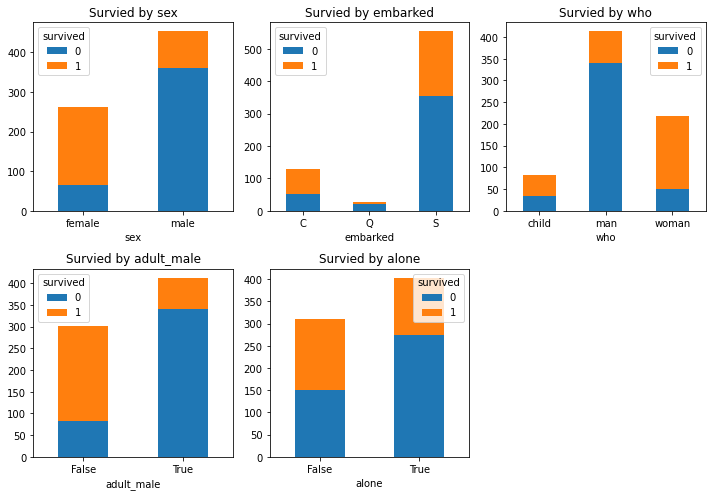

In [31]:
df = data[['sex','embarked','who','adult_male','alone']]
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    tmp = pd.pivot_table(data=data,index=c,columns='survived',values='age',aggfunc='count').reset_index()
    tmp.plot(x=c,kind='bar',stacked=True,ax=ax)
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
    plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

In [ ]:
'''
1. female -> 1
2. C -> 1
3. man -> 0, child+woman -> 1
4. adult_male -> 0
5. alone -> 1
'''

In [32]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

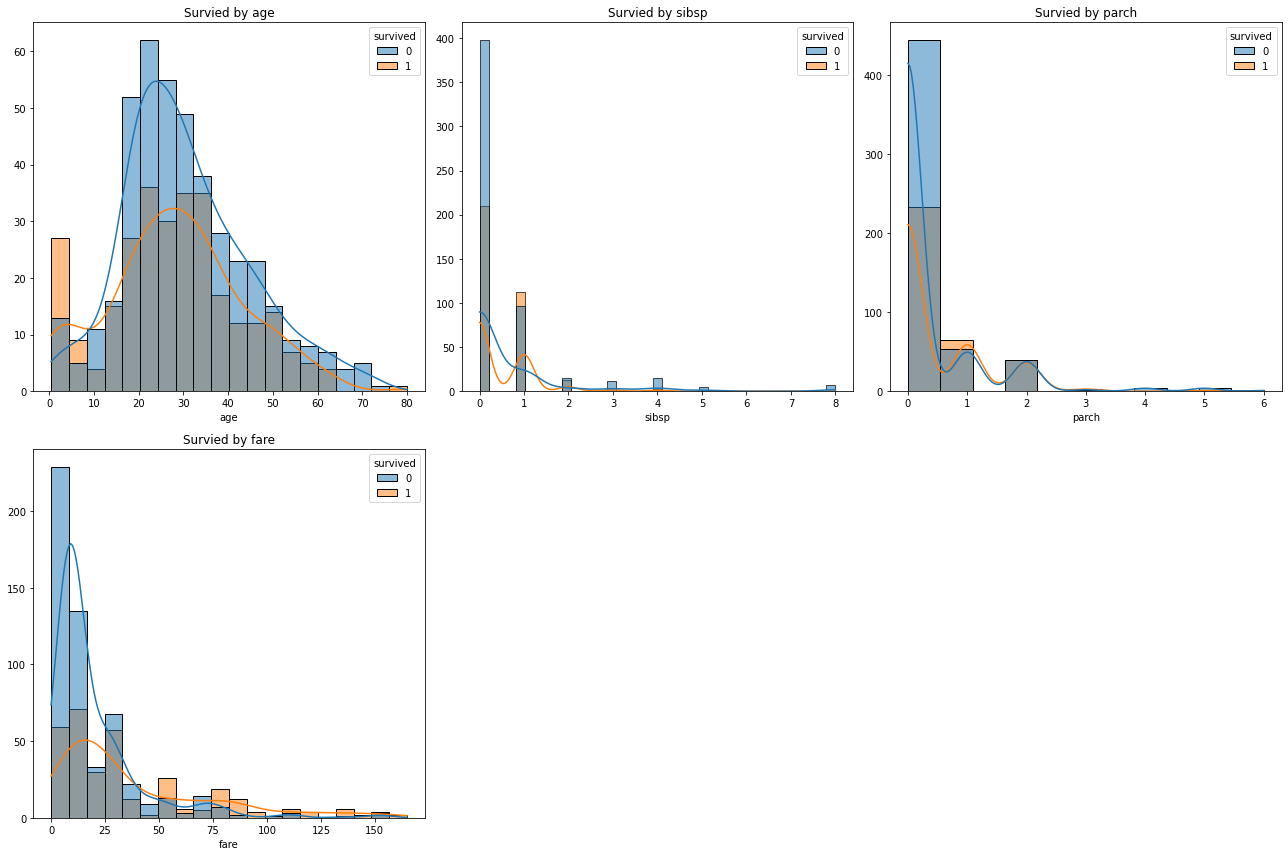

In [36]:
df = data[['age', 'sibsp', 'parch', 'fare']]
# Figure
fig = plt.figure(figsize=(18, 12))

# Define grid
ncols = 3
nrows = np.ceil(df.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    if c != 'fare':
        sns.histplot(data=data,x=c,hue='survived',kde=True,ax=ax)
    else:
        sns.histplot(data=data[data['fare']<=200],x=c,hue='survived',bins=20,kde=True,ax=ax)
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
#     plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

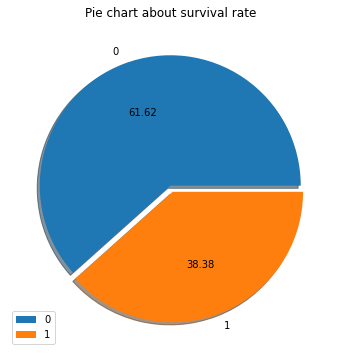

In [14]:
titanic_stats = titanic.survived.value_counts()
plt.figure(figsize = (6,6))
plt.pie(titanic_stats, labels = titanic_stats.index, autopct = '%.2f', explode=[0,0.05], shadow=True)
plt.title('Pie chart about survival rate')
plt.legend()
plt.show()

# Data preprocessing

## Handle Missing Values

### Age

- Easy imputation: mean, median, mode
- Domain imputation: 

In [37]:
## Easy imputation

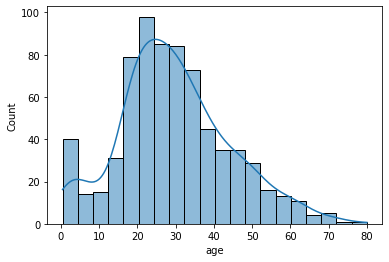

In [41]:
sns.histplot(data=data,x='age',kde=True)

In [39]:
data['age'].mean()

29.69911764705882

In [40]:
data['age'].median()

28.0

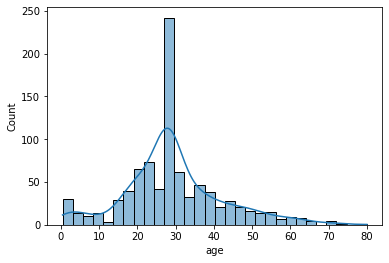

In [42]:
sns.histplot(data=data[['age']].fillna(data['age'].median()),x='age',kde=True)

In [43]:
agefill = data['age'].fillna(data['age'].median())
agefill.isna().sum()

0

In [44]:
from sklearn.impute import SimpleImputer

In [ ]:
sip = SimpleImputer(strategy='median')
sip.fit_transform(data[['age']])

In [46]:
## Domain imputation

In [47]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True


In [51]:
dna = data.groupby(['who','sibsp','parch'])['age'].agg(lambda x: x.isna().sum()/len(x)*100).reset_index()
dna[dna['age']>0]

,who,sibsp,parch,age
13,man,0,0,26.097561
16,man,1,0,11.864407
17,man,1,1,9.523810
18,man,1,2,20.000000
22,man,2,0,15.384615
24,man,3,1,100.000000
27,man,8,2,100.000000
28,woman,0,0,21.487603
29,woman,0,1,5.555556
30,woman,0,2,20.000000


In [56]:
data['age'] = data.groupby(['who','sibsp','parch'])['age'].apply(lambda x: x.fillna(x.mean()))

In [57]:
data['age'].isna().sum()

11